## **Importing Libraries**

In [1]:
#basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

# libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing

# evaluation libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


#train test split
from sklearn.model_selection import train_test_split as tts

#model
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import plot_tree

#import model
from pickle import dump

## Import Dataset

In [2]:
#read dataset using pandas, and save as pandas DataFrame
df = pd.read_csv("Life Expectancy Data_HV22.csv")

In [3]:
#Remove unwanted space from the DataFrame Column names
df.columns = df.columns.str.strip()

In [4]:
#Find number of null values in each column

#Make a list of all columns with null values
col_null = df.columns[df.isna().any()].tolist()

for i in col_null:
    #find total null values in particular column
    null = df[i].isna().sum()
    null = str(null)
    print("The column {} has {} null values".format(i, null))

The column Life expectancy has 10 null values
The column Adult Mortality has 10 null values
The column Alcohol has 194 null values
The column Hepatitis B has 553 null values
The column BMI has 34 null values
The column Polio has 19 null values
The column Total expenditure has 226 null values
The column Diphtheria has 19 null values
The column GDP has 448 null values
The column Population has 652 null values
The column thinness  1-19 years has 34 null values
The column thinness 5-9 years has 34 null values
The column Income composition of resources has 167 null values
The column Schooling has 163 null values


###**Data Imputation**

In [5]:
#imput data using mean of the respective column
for i in col_null:
    df[i].fillna((df[i].mean()), inplace=True)

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## **Label Encoder**

In [8]:
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
print(mapping)

{'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bhutan': 19, 'Bolivia (Plurinational State of)': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Brunei Darussalam': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, 'Cabo Verde': 28, 'Cambodia': 29, 'Cameroon': 30, 'Canada': 31, 'Central African Republic': 32, 'Chad': 33, 'Chile': 34, 'China': 35, 'Colombia': 36, 'Comoros': 37, 'Congo': 38, 'Cook Islands': 39, 'Costa Rica': 40, 'Croatia': 41, 'Cuba': 42, 'Cyprus': 43, 'Czechia': 44, "Côte d'Ivoire": 45, "Democratic People's Republic of Korea": 46, 'Democratic Republic of the Congo': 47, 'Denmark': 48, 'Djibouti': 49, 'Dominica': 50, 'Dominican Republic': 51, 'Ecuador': 52, 'Egypt': 53, 'El Salvador': 54, 'Equatorial Guinea': 55, 'E

In [9]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## **Train, Test Split**

In [10]:
#Dimensionality Reduction using Natural Neural Network to choose X and y
X = df[['Income composition of resources','Country','Adult Mortality','BMI','HIV/AIDS','Schooling']]
y = df['Life expectancy']

#Train, Test Split on X, y with 40% of data on test split
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.4, random_state=42)

#Display X_Train
X_train.head()

,Income composition of resources,Country,Adult Mortality,BMI,HIV/AIDS,Schooling
1801,0.604,116,299.0,31.8,6.2,11.4
2543,0.648,167,124.0,51.3,0.1,11.8
2936,0.427,192,686.0,25.9,42.1,9.8
115,0.930,7,61.0,65.0,0.1,20.1
1330,0.741,85,112.0,65.6,0.1,13.1


## **Modelling**

In [11]:
#compare different models
models = [LinearRegression(),RandomForestRegressor(),XGBRegressor(),DecisionTreeRegressor()]
models_s = ['Linear Regression','Random Forest Regressor','XGB Regressor','Decision Tree Regressor']

r2_s= []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print("rmse: ",np.sqrt(mse))
    print("mae: ",mae)
    print("r2 score: ",r2)
    print()
    r2_s.append(float(r2))

LinearRegression()
rmse:  4.5040632847357305
mae:  3.2376139251137683
r2 score:  0.7786092402021241

RandomForestRegressor()
rmse:  1.9239729754398358
mae:  1.2302775529952397
r2 score:  0.9596030610611049

[03:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
rmse:  2.387351589007023
mae:  1.7418349921297869
r2 score:  0.937801016288871

DecisionTreeRegressor()
rmse:  2.7009269747202125
mae:  1.6171556703282404
r2 score:  0.9203884265690265



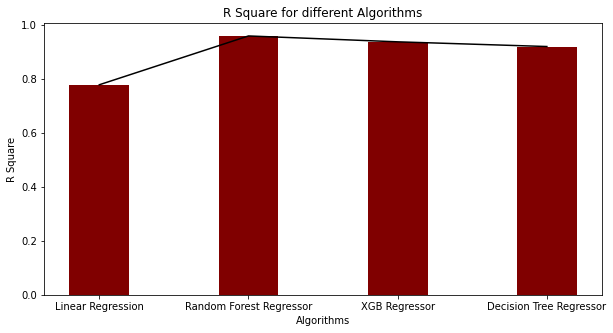

In [12]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models_s, r2_s, color ='maroon', width = 0.4)
plt.plot(models_s, r2_s, color ='black')

plt.xlabel("Algorithms")
plt.ylabel("R Square")
plt.title("R Square for different Algorithms")

plt.show()

We use Random Forest Regressor because it gives the most R Square and lease RMSE.

In [13]:
#Initialise XGBoost Model
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print accuracy scores
print("rmse: ",np.sqrt(mse))
print("r2 score: ",r2)

[03:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse:  1.7311307052781564
r2 score:  0.9672952945603658


In [14]:
#Dump model to pickle file
dump(model, open('model.pkl', 'wb'))

## **Model Predictionw with User Input**

In [15]:
features = ['Income composition of resources','Country','Adult Mortality','BMI','HIV/AIDS','Schooling']
#take input from user
inp=[]
for i in (features):
    print("Enter ",i)
    a=input()
    inp.append(a)
  

Enter  Income composition of resources
0.479
Enter  Country
Afghanistan
Enter  Adult Mortality
0.41
Enter  BMI
1.4
Enter  HIV/AIDS
2.4
Enter  Schooling
2.2


In [16]:
#get the inverse transform of label encoded Country column
c=mapping.get(inp[1])
inp[1]=c


1

In [17]:
inp=[float(i) for i in inp]

In [18]:
#make dataset 
finalInput=pd.DataFrame(data = inp)
finalInput = finalInput.T

#rename columns to make it easier to predict
finalInput.rename(columns = {0:'Income composition of resources'}, inplace = True)
finalInput.rename(columns = {1:'Country'}, inplace = True)
finalInput.rename(columns = {2:'Adult Mortality'}, inplace = True)
finalInput.rename(columns = {3:'BMI'}, inplace = True)
finalInput.rename(columns = {4:'HIV/AIDS'}, inplace = True)
finalInput.rename(columns = {5:'Schooling'}, inplace = True)

print(finalInput)

   Income composition of resources  Country  Adult Mortality  BMI  HIV/AIDS  \
0                            0.479      1.0             0.41  1.4       2.4   

   Schooling  
0        2.2  


In [19]:
#predict using the user input
y_pred = model.predict(finalInput)

In [23]:
print("Your Life Expectancy is {}".format(round(y_pred[0])))

Your Life Expectancy is 54
